In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

hdi = pd.read_excel(r'hdi.xlsx')
#hdi = hdi.set_index('country')
hdi = hdi.replace(np.nan, 0)
hdi = hdi.iloc[: , 1:]
hdi

,Unnamed: 0.1,country,year,hdi,hdi.level
0,0,Afghanistan,1990,0.302,Low
1,1,Afghanistan,1991,0.307,Low
2,2,Afghanistan,1992,0.316,Low
3,3,Afghanistan,1993,0.312,Low
4,4,Afghanistan,1994,0.307,Low
...,...,...,...,...,...
1295,1295,Uzbekistan,2011,0.676,Medium
1296,1296,Uzbekistan,2012,0.685,Medium
1297,1297,Uzbekistan,2013,0.692,Medium
1298,1298,Uzbekistan,2014,0.696,Medium


In [48]:
conditions = [
    (hdi['hdi'] >= 0.8),
    (hdi['hdi'] < 0.8) & (hdi['hdi'] >= 0.7),
    (hdi['hdi'] < 0.7) & (hdi['hdi'] >= 0.55),
    (hdi['hdi'] < 0.55) & (hdi['hdi']!= 0),
    (hdi['hdi'] == 0)]

choices = ['Very high', 'High', 'Medium', 'Low', 'No data']
hdi['hdi.level'] = np.select(conditions, choices)

hdi

,Unnamed: 0.1,country,year,hdi,hdi.level
0,0,Afghanistan,1990,0.302,Low
1,1,Afghanistan,1991,0.307,Low
2,2,Afghanistan,1992,0.316,Low
3,3,Afghanistan,1993,0.312,Low
4,4,Afghanistan,1994,0.307,Low
...,...,...,...,...,...
1295,1295,Uzbekistan,2011,0.676,Medium
1296,1296,Uzbekistan,2012,0.685,Medium
1297,1297,Uzbekistan,2013,0.692,Medium
1298,1298,Uzbekistan,2014,0.696,Medium


In [49]:
d=hdi.groupby(['year'])['hdi'].mean().reset_index(name='hdi').set_index('year')

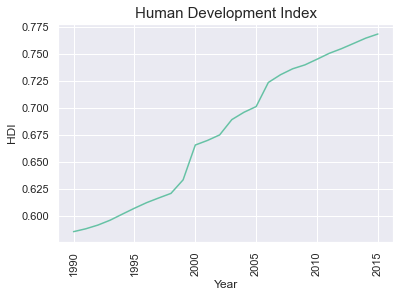

In [50]:
d['hdi'].plot()
plt.xticks(rotation=90)
plt.title(f"Human Development Index", size=15)
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()

In [51]:
d

,hdi
year,
1990,0.58582
1991,0.58846
1992,0.59190
1993,0.59640
1994,0.60198
1995,0.60746
1996,0.61262
1997,0.61698
1998,0.62118


In [52]:
d['hdi'].mean()

0.6780369230769232

Text(0, 0.5, 'Number of countries')

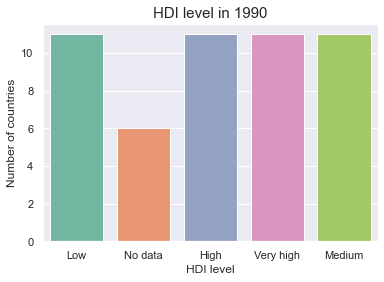

In [53]:
hdi1990 = hdi.loc[hdi['year'] == 1990]
ax = sns.countplot(x = "hdi.level", data=hdi1990)
plt.title(f"HDI level in 1990", size=15)
plt.xlabel('HDI level')
plt.ylabel('Number of countries')

Text(0, 0.5, 'Number of countries')

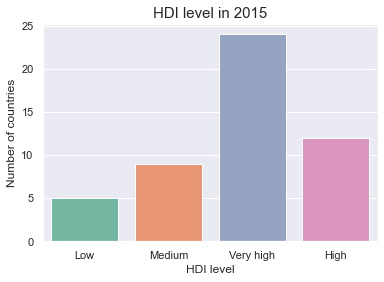

In [54]:
hdi1990 = hdi.loc[hdi['year'] == 2015]
ax = sns.countplot(x = "hdi.level", data=hdi1990)
plt.title(f"HDI level in 2015", size=15)
plt.xlabel('HDI level')
plt.ylabel('Number of countries')

In [55]:
hdi.to_excel(r'hdi.xlsx')

In [56]:
hdi = hdi.set_index('country')